In [10]:
import pandas as pd
import os
import glob
import concurrent.futures
import time

directory = 'C:\\Users\\minhtriet.pham\\Desktop\\Data Invoice 20230327\\NAM 2023\\Month 3'
directory2 = 'C:\\Users\\minhtriet.pham\\Desktop\\Data Invoice 20230327\\NAM 2023\\Month 3'
cate_dir = 'C:\\Users\\minhtriet.pham\\Desktop\\DataCate.xlsx'
cate_dir2 = 'C:\\Users\\minhtriet.pham\\Desktop\\DataCate.xlsx'

# list of Excel files to read data from
if os.path.exists(os.path.join(directory, '230301 Payment Summary - 2023-03-02T084245.428.xlsx')):
    excel_files = glob.glob(os.path.join(directory, '*.xlsx'))
else:
    excel_files = glob.glob(os.path.join(directory2, '*.xlsx'))
try:
    # # use cols 0, Barcode; 2, Category Name
    # df2 = pd.read_excel(cate_dir, sheet_name='Sheet1', usecols=[0,2])
    # use cols 0, Barcode; 3, SubCategory Name
    df2 = pd.read_excel(cate_dir, sheet_name='Sheet1', usecols=[0,3])
    pass
except FileNotFoundError:
    # df2 = pd.read_excel(cate_dir2, sheet_name='Sheet1', usecols=[0,2])
    # use cols 0, Barcode; 3, SubCategory Name
    df2 = pd.read_excel(cate_dir2, sheet_name='Sheet1', usecols=[0,3])
    pass
# create an empty list to store the dataframes
# dfs = [] sho

outputfile =  'dataM3.csv'
# def excel2csv
def excel2csv(inputfile, outputfile):
    
    # Check if exist file_path
    if not os.path.exists(outputfile):
        with open(outputfile, 'w') as f:
            pass

    # Read the first line of the file
    with open(outputfile, 'r') as f:
        first_line = f.readline().strip()
    # Check if the first line contains the expected column names
    has_headers = 'InvoiceID' in first_line
    df = pd.read_excel(inputfile, sheet_name='Sheet2', skiprows=2, usecols=[4,7,8,14])
    # df2 Category
    # # merge with Category, on "Barcode"
    # df = df.merge(df2, on='Barcode', how='left')
    # merge with Sub Category, on "Barcode"
    df = df.merge(df2, on='Barcode', how='left')
    
    # Check if the first line contains the expected column names
    df.to_csv(outputfile, mode='a', header= not has_headers, index=False)


# loop through the list of Excel files
with concurrent.futures.ThreadPoolExecutor() as executor:
    [executor.submit(excel2csv, file, outputfile) for file in excel_files]
    # for file in excel_files:
    #     executor.submit(excel2csv,file)

In [2]:
import pandas as pd

# Sample data
dtypes = {'InvoiceID': str, 'Barcode': str, 'Sum of Qty': str, 'Total Exclude VAT': str, 'SubCategory Name': str}
# df = pd.read_csv(r'C:\Users\minhtriet.pham\Desktop\New folder\Quantity\dataM3.csv', dtype=dtypes, on_bad_lines='warn')
# df = pd.read_csv(r'C:\Users\minhtriet.pham\Desktop\New folder\Quantity\dataM3.csv', dtype=dtypes, on_bad_lines='warn')
df = pd.read_csv(r'C:\Users\trieu.pham\OneDrive - BTM Global Consulting\Projects\data csv\dataM1.csv', dtype=dtypes, on_bad_lines='warn')

df['Sum of Qty'] = pd.to_numeric(df['Sum of Qty'], errors='coerce').fillna(0).astype(int)
df['Total Exclude VAT'] = pd.to_numeric(df['Total Exclude VAT'], errors='coerce').fillna(0).astype(float)
df['SubCategory Name'] = df['SubCategory Name'].astype(str)
# df['Category Name'] = df['Category Name'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5377868 entries, 0 to 5377867
Data columns (total 5 columns):
 #   Column             Dtype  
---  ------             -----  
 0   InvoiceID          object 
 1   Barcode            object 
 2   Sum of Qty         int32  
 3   Total Exclude VAT  float64
 4   SubCategory Name   object 
dtypes: float64(1), int32(1), object(3)
memory usage: 184.6+ MB


In [3]:
# Filter InvoiceIDs where sum of Qty is 0 for all barcodes
invoice_ids_with_zero_qty = df.groupby('InvoiceID').filter(lambda x: x['Sum of Qty'].sum() == 0)['InvoiceID'].unique()

In [4]:
# Filter the original data frame based on the InvoiceIDs
df_filtered_invoice_id_zero_qty = df[df['InvoiceID'].isin(invoice_ids_with_zero_qty)]

df_filtered_invoice_id_zero_qty.sort_values(by=['InvoiceID', 'Barcode'])


,InvoiceID,Barcode,Sum of Qty,Total Exclude VAT,SubCategory Name
143238,InvoiceID,Barcode,0,0.0,SubCategory Name
407146,VN0001011201230219,2010101000005,0,0.0,Cup Of Ice
407147,VN0001011201230219,8934588233074,0,0.0,Energy Drinks Sub
407145,VN0001011201230219,8935023911137,0,0.0,Energy Drinks Sub
2363221,VN0001011501230059,2010104000118,0,0.0,Cold Local Drinks
...,...,...,...,...,...
4184653,VN0236012501230050,8935001816652,0,0.0,School Supplies
4138219,VN0236012901230021,8934563306847,0,0.0,Instant Noodles Pack
4138225,VN0236012901230024,8935049501527,0,0.0,No/Less Sugar CSD
4262117,VN0236013001230032,8935302600257,0,0.0,Raw material


In [5]:
df

,InvoiceID,Barcode,Sum of Qty,Total Exclude VAT,SubCategory Name
0,VN0001010201230001,8809005029823,1,24545.0,Sugar CSD
1,VN0001010201230002,8850157000864,1,8182.0,Meat snacks
2,VN0001010201230002,8850157511681,1,18182.0,Alternative Snacks
3,VN0001010201230002,93682961,1,21818.0,Chocolate Pack
4,VN0001010201230002,8934803043075,1,6364.0,Salty Snacks
...,...,...,...,...,...
5377863,VN9996020102230158,8858223013039,1,17273.0,Alternative Snacks
5377864,VN9996020102230158,4897036691342,1,34545.0,Energy Drinks Sub
5377865,VN9996020102230159,8934588063053,1,6364.0,Purified water
5377866,VN9996020102230159,2270102000033,1,18182.0,Onigiri


In [6]:
# Find records in df that are not included in df_filtered_invoice_id_zero_qty
df_filtered = pd.merge(df, df_filtered_invoice_id_zero_qty, on=['InvoiceID', 'Barcode', 'Sum of Qty', 'Total Exclude VAT', 'SubCategory Name'], how='left', indicator=True)
df_filtered = df_filtered[df_filtered['_merge'] == 'left_only'].drop('_merge', axis=1)
df_filtered

,InvoiceID,Barcode,Sum of Qty,Total Exclude VAT,SubCategory Name
0,VN0001010201230001,8809005029823,1,24545.0,Sugar CSD
1,VN0001010201230002,8850157000864,1,8182.0,Meat snacks
2,VN0001010201230002,8850157511681,1,18182.0,Alternative Snacks
3,VN0001010201230002,93682961,1,21818.0,Chocolate Pack
4,VN0001010201230002,8934803043075,1,6364.0,Salty Snacks
...,...,...,...,...,...
5378603,VN9996020102230158,8858223013039,1,17273.0,Alternative Snacks
5378604,VN9996020102230158,4897036691342,1,34545.0,Energy Drinks Sub
5378605,VN9996020102230159,8934588063053,1,6364.0,Purified water
5378606,VN9996020102230159,2270102000033,1,18182.0,Onigiri


In [20]:
import pandas as pd
import numpy as np

# filter out rows where 'Sum of Qty' or 'Total Exclude VAT' are zero

group_by_invoice = df_filtered.dropna().groupby('InvoiceID').agg({'Barcode': lambda x: ', '.join(x.astype(str)), 
                                      'Sum of Qty': 'sum', 
                                      'Total Exclude VAT': 'sum', 
                                      'SubCategory Name': lambda x: ', '.join(x.astype(str))}).reset_index()
group_by_invoice

,InvoiceID,Barcode,Sum of Qty,Total Exclude VAT,SubCategory Name
0,401230091,2702010000077,1,31818.0,Sandwich
1,VN0001010101230001,"8935049500544, 8935049500544",2,12962.0,"Mineral water, Mineral water"
2,VN0001010101230002,"8938512632025, 8938512632025",4,22224.0,"Purified water, Purified water"
3,VN0001010101230003,"8936011773416, 8936079121761, 8850453017528, 8...",10,212964.0,"Other Ice Cream, Potato Snacks, Stick, UHT Mil..."
4,VN0001010101230004,"8801100128845, 2010101000005, 2010805000295, 8...",12,348956.0,"Distilled Spirits, Cup Of Ice, Add-on item Sub..."
...,...,...,...,...,...
2151455,VN9996023001230534,8935049510864,1,6364.0,Purified water
2151456,VN9996023001230535,"8935049501503, 8938500432835",2,27272.0,"Sugar CSD, Instant Sausage"
2151457,VN9996023001230536,"8935049501244, 8935049501534",2,21818.0,"Sports Drinks Sub, No/Less Sugar CSD"
2151458,VN9996023001230537,"8934588022111, 2010902000198, 2010101000005, 8...",7,87272.0,"Sugar CSD, Onigiri, Cup Of Ice, Salty Snacks, ..."


In [21]:
# filter group_by_invoice by upper_bound and lower_bound
upper_bound = 50000000
lower_bound = 1000

group_by_invoice_filtered = group_by_invoice[(group_by_invoice['Total Exclude VAT'] >= lower_bound) & (group_by_invoice['Total Exclude VAT'] <= upper_bound)]

group_by_invoice_filtered

,InvoiceID,Barcode,Sum of Qty,Total Exclude VAT,SubCategory Name
0,401230091,2702010000077,1,31818.0,Sandwich
1,VN0001010101230001,"8935049500544, 8935049500544",2,12962.0,"Mineral water, Mineral water"
2,VN0001010101230002,"8938512632025, 8938512632025",4,22224.0,"Purified water, Purified water"
3,VN0001010101230003,"8936011773416, 8936079121761, 8850453017528, 8...",10,212964.0,"Other Ice Cream, Potato Snacks, Stick, UHT Mil..."
4,VN0001010101230004,"8801100128845, 2010101000005, 2010805000295, 8...",12,348956.0,"Distilled Spirits, Cup Of Ice, Add-on item Sub..."
...,...,...,...,...,...
2151455,VN9996023001230534,8935049510864,1,6364.0,Purified water
2151456,VN9996023001230535,"8935049501503, 8938500432835",2,27272.0,"Sugar CSD, Instant Sausage"
2151457,VN9996023001230536,"8935049501244, 8935049501534",2,21818.0,"Sports Drinks Sub, No/Less Sugar CSD"
2151458,VN9996023001230537,"8934588022111, 2010902000198, 2010101000005, 8...",7,87272.0,"Sugar CSD, Onigiri, Cup Of Ice, Salty Snacks, ..."


In [9]:
import statistics
from scipy import stats
# Calculate the statistical measures using describe() method
stat = group_by_invoice_filtered.describe()

# Calculate the median and mode of the 'Total Exclude VAT' column
mean = statistics.mean(group_by_invoice_filtered['Total Exclude VAT'])
median = statistics.median(group_by_invoice_filtered['Total Exclude VAT'])
mode = group_by_invoice_filtered['Total Exclude VAT'].mode()[0]
std = statistics.stdev(group_by_invoice_filtered['Total Exclude VAT'])
Sum = group_by_invoice_filtered['Total Exclude VAT'].sum()
min_val = group_by_invoice_filtered['Total Exclude VAT'].min()
max_val = group_by_invoice_filtered['Total Exclude VAT'].max()
# Extract the desired values from the summary
mean1 = stat.loc['mean']
std1 = stat.loc['std']
min_val1 = stat.loc['min']
max_val1 = stat.loc['max']

# Print the results
print("Mean:", mean)
print("Median:", median)
print("Mode:", mode)
print("Standard Deviation:", std)
print ("Sum:", Sum)
print("Minimum Value:", min_val)
print("Maximum Value:", max_val)

# print("Mode of Total Exculde VAT", group_by_invoice['Total Exclude VAT'].mode()[0])

# Create a DataFrame with the calculated statistical measures
summary_statistic_df = pd.DataFrame({'Mean': [mean],
                                     'Median': [median],
                                     'Mode': [mode],
                                     'Standard Deviation': [std],
                                     'Sum': [Sum],
                                     'Minimum Value': [min_val],
                                     'Maximum Value': [max_val]})

# Export the DataFrame to an Excel file
summary_statistic_df.to_excel('Summary Statistic M3.xlsx', index=False)

Mean: 56982.65250729512
Median: 32727.0
Mode: 10909.0
Standard Deviation: 103654.62161354334
Sum: 122594643944.99
Minimum Value: 1818.0
Maximum Value: 35754545.0


In [10]:
import numpy as np
import pandas as pd
#  Update bins and labels for the new range concept
bins = np.concatenate(([0], np.arange(0, 50000, 5000), np.arange(50000, 100000, 10000), np.arange(100000, 350000, 25000), np.arange(100000, 350001, 50000), [np.inf]))
bins = np.unique(bins)  # Remove duplicate edges
labels = ['{} to {}' .format(i, i+4999) for i in range(0, 50000, 5000)] + ['{} to {}' .format(i, i+9999) for i in range(50000, 100000, 10000)] + ['{} to {}' .format(i, i+24999) for i in range(100000, 350000, 25000)] + [ '>=350000']

def grouped_data(df_filtered):

    df_filtered['Basket Value'] = pd.cut(df_filtered['Total Exclude VAT'], bins=bins, labels=labels)
    grouped_data = df_filtered.groupby('Basket Value')['Total Exclude VAT'].agg(['count','mean','median'])

    # Add a new column for Count x Mean
    grouped_data['Value'] = grouped_data['count'] * grouped_data['mean']

    # Update x-axis labels
    grouped_data.index = grouped_data.index.astype(str).str.replace(',', '')

    return grouped_data

grouped_data = grouped_data(group_by_invoice_filtered)

grouped_data


C:\Users\trieu.pham\AppData\Local\Temp\ipykernel_8380\3052343785.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Basket Value'] = pd.cut(df_filtered['Total Exclude VAT'], bins=bins, labels=labels)


,count,mean,median,Value
Basket Value,,,,
0 to 4999,21290,3142.778863,2727.0,6.690976e+07
5000 to 9999,188693,8024.414091,8182.0,1.514151e+09
10000 to 14999,239644,12289.276660,11818.0,2.945051e+09
15000 to 19999,225108,17774.206643,18182.0,4.001116e+09
20000 to 24999,165487,22694.925656,22727.0,3.755715e+09
25000 to 29999,169989,27486.128114,27273.0,4.672339e+09
30000 to 34999,136186,32744.115482,32727.0,4.459290e+09
35000 to 39999,123020,37520.531255,37273.0,4.615776e+09
40000 to 44999,88499,42694.473598,42727.0,3.778418e+09


c:\Users\trieu.pham\anaconda3\envs\myenv\Lib\site-packages\matplotlib\axes\_axes.py:6826: RuntimeWarning: invalid value encountered in multiply
  boffset = -0.5 * dr * totwidth * (1 - 1 / nx)


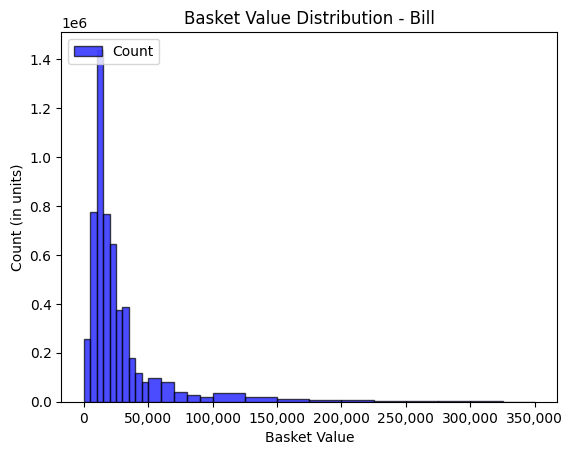

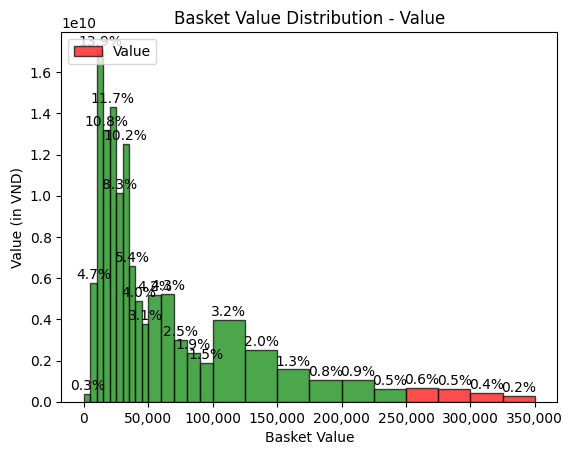

                    Count     Mean   Median         Value  %Value in total
Basket Value                                                              
0 to 4999          21,290    3,143    2,727  6.690976e+07         0.054578
5000 to 9999      188,693    8,024    8,182  1.514151e+09         1.235087
10000 to 14999    239,644   12,289   11,818  2.945051e+09         2.402268
15000 to 19999    225,108   17,774   18,182  4.001116e+09         3.263696
20000 to 24999    165,487   22,695   22,727  3.755715e+09         3.063523
25000 to 29999    169,989   27,486   27,273  4.672339e+09         3.811210
30000 to 34999    136,186   32,744   32,727  4.459290e+09         3.637427
35000 to 39999    123,020   37,521   37,273  4.615776e+09         3.765071
40000 to 44999     88,499   42,694   42,727  3.778418e+09         3.082042
45000 to 49999     90,870   47,530   47,273  4.319059e+09         3.523040
50000 to 59999    127,830   55,053   54,546  7.037368e+09         5.740355
60000 to 69999     99,432

In [23]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# Calculate total value
total_value = grouped_data['Value'].sum()

# Add a new column for %Value in total
grouped_data['%Value in total'] = grouped_data['Value'] / total_value * 100

# Plot histogram for count
fig, ax1 = plt.subplots()
n, bins, patches = ax1.hist(df_filtered['Total Exclude VAT'], bins=bins, cumulative=False, alpha=0.7, color='blue', edgecolor='black')
ax1.set_xlabel('Basket Value')
ax1.set_ylabel('Count (in units)')
ax1.set_title('Basket Value Distribution - Bill')
ax1.legend(['Count'], loc='upper left')
ax1.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(int(x))))

# Plot histogram for value
fig, ax2 = plt.subplots()
n2, bins2, patches2 = ax2.hist(df_filtered['Total Exclude VAT'], bins=bins, cumulative=False, alpha=0.7, color='red', edgecolor='black', weights=df_filtered['Total Exclude VAT'])
ax2.set_xlabel('Basket Value')
ax2.set_ylabel('Value (in VND)')
ax2.set_title('Basket Value Distribution - Value')
ax2.legend(['Value'], loc='upper left')
ax2.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(int(x))))

# Add percentage value labels to the top of each column
for i in range(len(patches2)):
    height = patches2[i].get_height()
    percentage = height / total_value * 100
    ax2.annotate(f'{percentage:.1f}%', xy=(patches2[i].get_x() + patches2[i].get_width() / 2, height), xytext=(0, 3), textcoords='offset points', ha='center')

# Highlight columns with cumulative %Value in total up to 80%
cumulative_percentage = 0
for i, patch in enumerate(patches2):
    cumulative_percentage += grouped_data['%Value in total'].iloc[i]
    if cumulative_percentage <= 80:
        patch.set_fc('green')
    else:
        patch.set_fc('red')

plt.show()

# Display grouped data with additional column
grouped_data['Count'] = grouped_data['count'].apply(lambda x: '{:,.0f}'.format(x) if 'count' in grouped_data.columns else None)
grouped_data['Mean'] = grouped_data['mean'].apply(lambda x: '{:,.0f}'.format(x))
grouped_data['Median'] = grouped_data['median'].apply(lambda x: '{:,.0f}'.format(x))
grouped_data['Count x Mean'] = grouped_data['Value'].apply(lambda x: '{:,.0f}'.format(x))
grouped_data = grouped_data[['Count', 'Mean', 'Median', 'Value', '%Value in total']]
print(grouped_data)

In [27]:
# grouped_data.to_csv('groupdataM3.csv')
group_by_invoice_filtered

,InvoiceID,Barcode,Sum of Qty,Total Exclude VAT,SubCategory Name,StoreID,BusinessDate
0,401230091,2702010000077,1,31818.0,Sandwich,401230,1
1,VN0001010101230001,"8935049500544, 8935049500544",2,12962.0,"Mineral water, Mineral water",VN0001,010123
2,VN0001010101230002,"8938512632025, 8938512632025",4,22224.0,"Purified water, Purified water",VN0001,010123
3,VN0001010101230003,"8936011773416, 8936079121761, 8850453017528, 8...",10,212964.0,"Other Ice Cream, Potato Snacks, Stick, UHT Mil...",VN0001,010123
4,VN0001010101230004,"8801100128845, 2010101000005, 2010805000295, 8...",12,348956.0,"Distilled Spirits, Cup Of Ice, Add-on item Sub...",VN0001,010123
...,...,...,...,...,...,...,...
2151455,VN9996023001230534,8935049510864,1,6364.0,Purified water,VN9996,300123
2151456,VN9996023001230535,"8935049501503, 8938500432835",2,27272.0,"Sugar CSD, Instant Sausage",VN9996,300123
2151457,VN9996023001230536,"8935049501244, 8935049501534",2,21818.0,"Sports Drinks Sub, No/Less Sugar CSD",VN9996,300123
2151458,VN9996023001230537,"8934588022111, 2010902000198, 2010101000005, 8...",7,87272.0,"Sugar CSD, Onigiri, Cup Of Ice, Salty Snacks, ...",VN9996,300123


In [33]:
# Apply string slicing to create new columns 'StorID' and 'BusinessDate'
group_by_invoice_filtered['StoreID'] = group_by_invoice_filtered['InvoiceID'].map(lambda x: x[:6])
group_by_invoice_filtered['BusinessDate'] = group_by_invoice_filtered['InvoiceID'].map(lambda x: x[8:14])

# Reorder the columns
group_by_invoice_filtered = group_by_invoice_filtered.reindex (columns=['InvoiceID','StoreID','BusinessDate','Barcode','Sum of Qty','Total Exclude VAT','SubCategory Name'])

# Show the first 5 rows
group_by_invoice_filtered.head(5)



,InvoiceID,StoreID,BusinessDate,Barcode,Sum of Qty,Total Exclude VAT,SubCategory Name
0,401230091,401230,1,2702010000077,1,31818.0,Sandwich
1,VN0001010101230001,VN0001,010123,"8935049500544, 8935049500544",2,12962.0,"Mineral water, Mineral water"
2,VN0001010101230002,VN0001,010123,"8938512632025, 8938512632025",4,22224.0,"Purified water, Purified water"
3,VN0001010101230003,VN0001,010123,"8936011773416, 8936079121761, 8850453017528, 8...",10,212964.0,"Other Ice Cream, Potato Snacks, Stick, UHT Mil..."
4,VN0001010101230004,VN0001,010123,"8801100128845, 2010101000005, 2010805000295, 8...",12,348956.0,"Distilled Spirits, Cup Of Ice, Add-on item Sub..."


In [43]:
# Calculate the ADS for each store
grouped_by_store_net = group_by_invoice_filtered.groupby('StoreID').agg({'InvoiceID': 'first','Total Exclude VAT': 'sum', 'Sum of Qty': 'sum', 'BusinessDate': 'nunique'})
grouped_by_store_net['ADS'] = grouped_by_store_net['Total Exclude VAT'] / grouped_by_store_net['BusinessDate']

# Reset the index to make 'StoreID' a regular column
grouped_by_store_net = grouped_by_store_net.reset_index()

# Show the updated DataFrame
grouped_by_store_net


,StoreID,InvoiceID,Total Exclude VAT,Sum of Qty,BusinessDate,ADS
0,401230,401230091,3.181800e+04,1,1,3.181800e+04
1,VN0001,VN0001010101230001,7.389153e+08,44420,31,2.383598e+07
2,VN0002,VN0002010101230001,1.011246e+09,48229,31,3.262083e+07
3,VN0003,VN0003010101230001,9.517787e+08,52034,31,3.070254e+07
4,VN0004,VN0004010102230001,5.002319e+08,32005,17,2.942541e+07
...,...,...,...,...,...,...
207,VN0233,VN0233010101230001,2.821556e+08,15123,31,9.101794e+06
208,VN0234,VN0234010201230001,3.809383e+08,21778,31,1.228833e+07
209,VN0235,VN0235010101230001,4.428927e+08,25542,31,1.428686e+07
210,VN0236,VN0236010101230001,5.454090e+08,28910,31,1.759384e+07


In [ ]:
df_filtered

,InvoiceID,Barcode,Sum of Qty,Total Exclude VAT,SubCategory Name
0,VN0001011203230001,8934588063053,1,6364.0,Purified water
1,VN0001011203230001,8936149340047,1,33636.0,Meat snacks
2,VN0001011203230002,8936079140014,1,15455.0,Coffee Drinks Sub
3,VN0001011203230002,8809351209948,1,44545.0,WIC/RIC Juice
4,VN0001011203230003,2010901000243,1,35455.0,Bento
...,...,...,...,...,...
4718002,VN0239022403230441,2270103000100,1,34545.0,Gimbap
4718003,VN0239022403230441,8935005801012,1,11818.0,Mineral water
4718004,VN0239022403230442,8935001718444,1,6364.0,Hard Candy
4718005,VN0239022403230442,8936036021745,1,20909.0,Potato Snacks


In [ ]:
import numpy as np
from sklearn.linear_model import RANSACRegressor

# StoreID and BusinessDate added to the filter dataframe
df_filtered['InvoiceID'] = df_filtered['InvoiceID'].astype(str)
df_filtered['StoreID'] = df_filtered['InvoiceID'].apply(lambda x: x[:6])
df_filtered['BusinessDate'] = df_filtered['InvoiceID'].apply(lambda x: x[8:14])

# Group by Basket Value and StoreID and calculate count and mean
grouped_data_store = df_filtered.groupby(['Basket Value', 'StoreID']).agg({'InvoiceID': 'count', 'Total Exclude VAT': 'mean'})
grouped_data_store.rename(columns={'InvoiceID': 'count', 'Total Exclude VAT': 'mean'}, inplace=True)
grouped_data_store.reset_index(inplace=True)

# Calculate the 'value' column as the product of 'mean' and 'count'
grouped_data_store['Value'] = grouped_data_store['mean'] * grouped_data_store['count']

# Drop rows with NaN or 0 values in 'mean' or 'Value' columns
grouped_data_store.dropna(subset=['mean', 'Value'], inplace=True)
grouped_data_store = grouped_data_store[(grouped_data_store['mean'] != 0) & (grouped_data_store['Value'] != 0)]

# Fit RANSAC Regression model to 'Value' and 'mean' columns
X = grouped_data_store[['Value']].values
y = grouped_data_store['mean'].values

regressor = RANSACRegressor()
regressor.fit(X, y)

# Predict the mean values using the fitted model
y_pred = regressor.predict(X)

# Calculate the residuals
residuals = y - y_pred

# Set a threshold for identifying outliers
threshold = 1.5 * np.median(np.abs(residuals))

# Identify outliers based on residuals
outliers = grouped_data_store[residuals > threshold]

# Remove outliers from the grouped_data_store DataFrame
grouped_data_store_clean = grouped_data_store[residuals <= threshold]

# Show the cleaned grouped data columns
print(grouped_data_store_clean)


KeyError: 'Basket Value'

In [ ]:
import numpy as np

# Sort the 'grouped_data_store' DataFrame by the 'value' column in descending order
grouped_data_store.sort_values('Value', ascending=False, inplace=True)

# Calculate the cumulative sum of the 'value' column
grouped_data_store['cumulative_sum'] = grouped_data_store['Value'].cumsum()

# Calculate the cumulative distribution percentage
grouped_data_store['cumulative_percentage'] = grouped_data_store['cumulative_sum'] / grouped_data_store['Value'].sum()

# Filter rows where the cumulative percentage is less than or equal to 0.8
filtered_data = grouped_data_store[grouped_data_store['cumulative_percentage'] >= 0.8]

# Print the filtered results
print(filtered_data)

          Basket Value StoreID  count           mean       Value  \
137          0 to 9999  VN0163   5401    7487.110535  40437884.0   
886     40000 to 49999  VN0048    896   45106.123884  40415087.0   
1178    50000 to 74999  VN0138    655   61692.366412  40408500.0   
1253    50000 to 74999  VN0214    653   61696.199081  40287618.0   
1153    50000 to 74999  VN0111    668   60251.675150  40248119.0   
...                ...     ...    ...            ...         ...   
1785  150000 to 199999  VN0103      1  174545.000000    174545.0   
1386    75000 to 99999  VN0133      2   79545.500000    159091.0   
1812  150000 to 199999  VN0133      1  152727.000000    152727.0   
1599  100000 to 149999  VN0133      1  117273.000000    117273.0   
639     30000 to 39999  401230      1   31818.000000     31818.0   

      cumulative_sum  cumulative_percentage  
137     9.889014e+10               0.800058  
886     9.893056e+10               0.800385  
1178    9.897097e+10               0.800712  